# Classify Using Relevant Features Found

**PROCESS**
- In notebook 2, the relevant features were found for both the UCI madelon dataset, and the Cook madelon dataset.
- Below, the classification models will be the same classification models used in the Benchmarking notebook (notebook 1). 
- The scores will then be compared to the raw classifiers used in the Benchmarking notebook.


**RELEVANT FEATURES FOUND FROM FEATURE EXTRACTION (NOTEBOOK 2) (difficult to identify true Redundant features from true Informative features)**
- *UCI Madelon* has a total of 20 relevant features: 28, 48, 64, 105, 128, 153, 241, 281, 318, 336, 338, 378, 433, 442, 451, 453, 455, 472, 475, and 493
- *Cook Madelon* has a total of 20 relevant features: 257, 269, 308, 315, 336, 341, 395, 504, 526, 639, 681, 701, 724, 736, 769, 808, 829, 867, 920, and 956

In [40]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install psycopg2 --quiet

In [4]:
import psycopg2 as pg2
from psycopg2.extras import RealDictCursor

In [5]:
import scipy.stats as stats

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [91]:
import warnings
warnings.filterwarnings('ignore')

### Load the Data
- Here, I loaded the data only using the relevant 20 features found in the two respective datasets.
- UCI Madelon: All 2,000 samples are going to be used from the train set and only the 20 relevant features, instead of the original 500 features.
- Josh's Madelon: All 220,000 samples will be used with only the 20 relevant features, instead of the original 1,000 features.

##### UCI Madelon

In [7]:
madelon_all_train = '../assets/madelon_train.data'
madelon_label_train = '../assets/madelon_train.labels'

In [8]:
madelon_all_train_df = pd.read_csv(madelon_all_train, delimiter=' ', header=None)
madelon_all_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,NaN
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,NaN
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,NaN
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,NaN
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,NaN


In [9]:
UCI_extracted_features = [28, 48, 64, 105, 128, 153, 241, 281, 318, 336, 338, 378, 433, 442, 451, 453, 455, 472, 475, 493]
madelon_train_relfeat_only = madelon_all_train_df.iloc[:, UCI_extracted_features]
madelon_train_relfeat_only.head()

,28,48,64,105,128,153,241,281,318,336,338,378,433,442,451,453,455,472,475,493
0,459,440,648,181,452,575,434,517,414,658,628,419,533,568,463,471,630,515,401,485
1,475,499,488,431,473,404,551,435,469,469,528,526,442,463,474,311,582,465,549,338
2,491,460,485,593,487,585,474,535,506,465,431,464,569,503,481,606,424,485,454,650
3,472,529,415,698,493,591,569,526,458,398,377,553,565,447,472,545,456,457,602,572
4,472,429,387,451,475,448,538,456,462,385,509,424,462,536,472,426,465,500,560,435


In [10]:
madelon_train_relfeat_only.shape

(2000, 20)

In [11]:
madelon_label_train_df = pd.read_csv(madelon_label_train, delimiter=' ', header=None)
madelon_label_train_df.rename(columns={0:'target'}, inplace=True)

In [12]:
to_concat = [madelon_train_relfeat_only, madelon_label_train_df]
madelon_rel_feat_train = pd.concat(to_concat, axis=1)
madelon_rel_feat_train.head()

,28,48,64,105,128,153,241,281,318,336,...,378,433,442,451,453,455,472,475,493,target
0,459,440,648,181,452,575,434,517,414,658,...,419,533,568,463,471,630,515,401,485,-1
1,475,499,488,431,473,404,551,435,469,469,...,526,442,463,474,311,582,465,549,338,-1
2,491,460,485,593,487,585,474,535,506,465,...,464,569,503,481,606,424,485,454,650,-1
3,472,529,415,698,493,591,569,526,458,398,...,553,565,447,472,545,456,457,602,572,1
4,472,429,387,451,475,448,538,456,462,385,...,424,462,536,472,426,465,500,560,435,1


In [13]:
madelon_rel_feat_train_only = madelon_rel_feat_train.drop('target', axis=1)
madelon_rel_feat_train_target = madelon_rel_feat_train['target']

In [14]:
madelon_valid = '../assets/madelon_valid.data'
madelon_valid_label = '../assets/madelon_valid.labels'

In [15]:
madelon_valid_df = pd.read_csv(madelon_valid, delimiter=' ', header=None)
madelon_valid_labels_df = pd.read_csv(madelon_valid_label, delimiter = ' ', header=None)

In [16]:
madelon_valid_labels_df.rename(columns={0:'target'}, inplace=True)

In [17]:
madelon_valid_df.drop(500, axis=1, inplace=True)

In [18]:
madelon_valid_df.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,483,454,513,495,523,469,453,477,506,479,...,455,480,543,259,413,520,485,498,523,510
1,485,508,493,487,478,472,504,476,479,475,...,486,480,535,534,514,452,484,495,548,477
2,483,521,507,475,493,486,421,475,496,483,...,491,476,498,495,508,528,486,465,508,503
3,474,504,576,480,553,483,524,478,483,483,...,521,475,470,463,509,525,479,467,552,517
4,495,474,523,479,495,488,485,476,497,478,...,510,471,522,343,509,520,475,493,506,491


In [19]:
madelon_valid_labels_df.head()

,target
0,-1
1,-1
2,-1
3,1
4,-1


In [20]:
to_concat_2 = [madelon_valid_df, madelon_valid_labels_df]
madelon_valid_all_df = pd.concat(to_concat_2, axis=1)

In [21]:
madelon_valid_all_df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,target
0,483,454,513,495,523,469,453,477,506,479,...,480,543,259,413,520,485,498,523,510,-1
1,485,508,493,487,478,472,504,476,479,475,...,480,535,534,514,452,484,495,548,477,-1
2,483,521,507,475,493,486,421,475,496,483,...,476,498,495,508,528,486,465,508,503,-1
3,474,504,576,480,553,483,524,478,483,483,...,475,470,463,509,525,479,467,552,517,1
4,495,474,523,479,495,488,485,476,497,478,...,471,522,343,509,520,475,493,506,491,-1


In [22]:
# choose only the relevant features from the valid dataset

In [23]:
madelon_valid_relevant_df = madelon_valid_all_df.iloc[:, UCI_extracted_features]
madelon_valid_relevant_target = madelon_valid_all_df['target']

In [24]:
madelon_valid_relevant_target.to_pickle('../assets/pickled_samples/madelon_valid_relevantfeat_targets.pkl')

In [25]:
madelon_valid_relevant_df.head()

,28,48,64,105,128,153,241,281,318,336,338,378,433,442,451,453,455,472,475,493
0,490,436,450,420,472,409,541,432,513,418,523,423,427,444,486,300,548,454,538,259
1,491,544,629,541,480,567,456,519,522,626,484,580,559,414,484,523,547,439,429,534
2,479,437,426,500,480,485,517,471,482,383,485,432,485,526,477,479,457,494,517,495
3,472,447,574,314,463,405,425,426,458,560,700,443,427,649,472,453,525,540,386,463
4,469,501,499,395,471,417,537,434,451,483,609,517,448,518,470,368,570,487,527,343


In [26]:
madelon_valid_relevant_df.to_pickle('../assets/pickled_samples/madelon_valid_relevantfeat_df.pkl')

##### Cook Madelon

In [27]:
# con = pg2.connect(host='34.211.227.227', dbname='postgres', user='postgres')
# cur = con.cursor(cursor_factory=RealDictCursor)

# cur.execute('SELECT feat_257, feat_269, feat_308, feat_315, feat_336, feat_341, feat_395, feat_504, feat_526, feat_639, feat_681, feat_701, feat_724, feat_736, feat_769, feat_808, feat_829, feat_867, feat_920, feat_956, target FROM madelon;')
# results1 = cur.fetchall()
# con.close()

Since Josh Cook closed the connection to his DB server, I will only build clsasification pipelines for the UCI madelon dataset.

### Train/Test/Split the Data
- ***UCI Madelon*** was not train test split, since the data on the website is already split into a train set and a test set. The data was imported above in the manner described under the **Load Data** section of this notebook where only the 20 relevant features (which were extracted from Feature Extraction techniques in Notebook 02) are being used for both the train set and the valid set provided by the website. 

##### UCI Madelon

In [28]:
madelonXtrain, madelonXtest, madelonytrain, madelonytest = train_test_split(madelon_rel_feat_train_only, \
                                                                            madelon_rel_feat_train_target)

### Preprocessing - Scale and Deskew

Preprocessing would include:
- deskewing
- scaling/normalizing

##### UCI Madelon

In [29]:
# Examine the Skew

uci_relfeat_orig_skew = []
for feature in madelonXtrain.columns:
    uci_relfeat_orig_skew.append((feature, stats.skew(madelonXtrain[feature])))

In [36]:
for feature_skew in uci_relfeat_orig_skew:
    print ('Feature %3d has skew of %7.4f'%(feature_skew[0], feature_skew[1]))

Feature  28 has skew of  0.0218
Feature  48 has skew of  0.0198
Feature  64 has skew of -0.0388
Feature 105 has skew of -0.0711
Feature 128 has skew of -0.1082
Feature 153 has skew of  0.0172
Feature 241 has skew of -0.0091
Feature 281 has skew of  0.0189
Feature 318 has skew of  0.0159
Feature 336 has skew of -0.0342
Feature 338 has skew of  0.0819
Feature 378 has skew of  0.0174
Feature 433 has skew of  0.0146
Feature 442 has skew of -0.0638
Feature 451 has skew of  0.0378
Feature 453 has skew of -0.0691
Feature 455 has skew of  0.0032
Feature 472 has skew of -0.0234
Feature 475 has skew of -0.0044
Feature 493 has skew of -0.0765


- visualize the original skew of each of the respective features

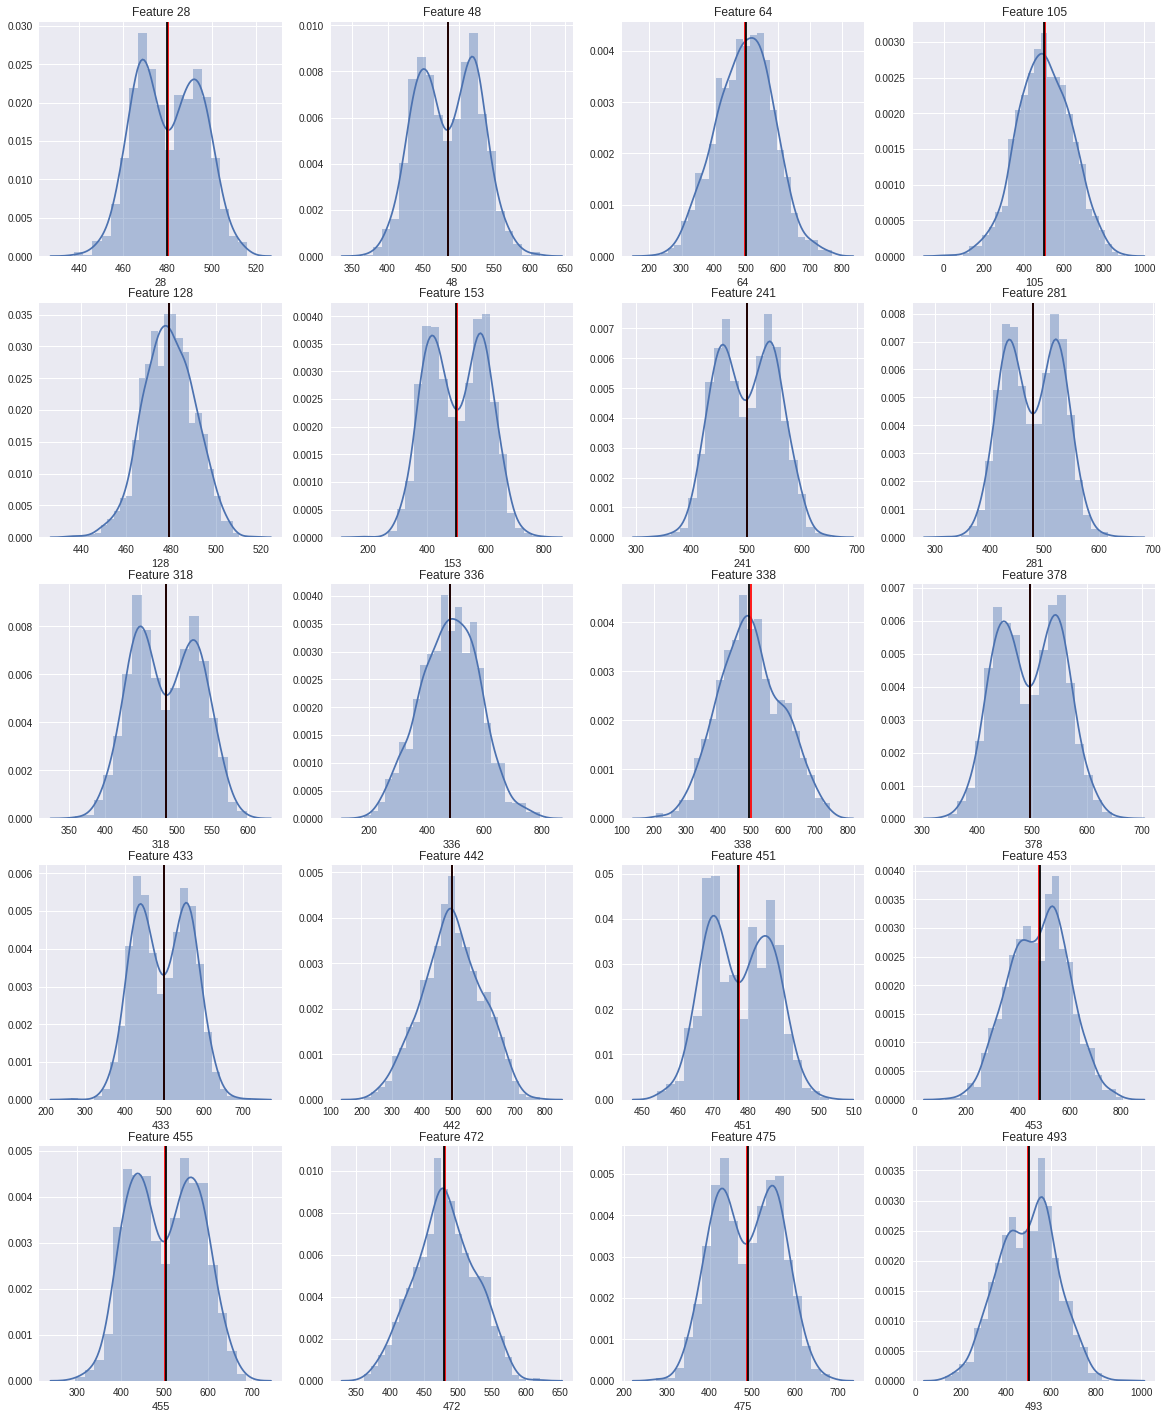

In [50]:
fig = plt.figure(figsize=(20,25))


for i in range(len(madelonXtrain.columns)):
    fig.add_subplot(5,4,i+1)
    sns.distplot(madelonXtrain.iloc[:,i])
    plt.axvline(madelonXtrain.iloc[:,i].mean(), c='red')
    plt.axvline(madelonXtrain.iloc[:,i].median(), c='black')
    plt.title('Feature {}'.format(madelonXtrain.columns[i]))

#### Observations:
- Certain of the features have bimodal distribution (e.g. Feature 28, 48, 475, 455)
- Though not totally obvious, the visualizations where the black and red line are not directly on top of one another have skew (also evidenced by the stats print out of each feature's skew in the cells preceding the visualization), where the mean (red) > median (black) (e.g. Feature 338) and therefore is more positively skewed.

#### Next Steps:
- Scale my data using a Min-Max approach (manually, since sklearn's MinMax Scaler will not accept floats as the floor. 
- Scale the data between 0.0001 and 1 in order to feed the datapoints into boxcox preprocessing 
- Note: Boxcox will not accept values *less than or equal to* zero. 
- Boxcox the data in an attempt to reduce skew
- Lastly, apply Standard Scaler to normalize the data based on the combined standard deviations of the respective features.

In [37]:
def myMinMaxScaler (df, lowerbound, upperbound):
    '''
    PARAM(S):
    input is a pandas DataFrame
    lowerbound is the user-specified min (float)
    upperbound is the user-specified max (float)
    
    RETURNS:
    a transformed DataFrame whose values are between 0.0001 and 1
    '''
    mmdf = (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))
    mmstddf = mmdf * (upperbound - lowerbound) + lowerbound
    return mmstddf

In [52]:
mmScaled_madelonXtrain = myMinMaxScaler(madelonXtrain, 0.0001, 1.0)
mmScaled_madelonXtrain.sample(10)

,28,48,64,105,128,153,241,281,318,336,338,378,433,442,451,453,455,472,475,493
1335,0.371858,0.578989,0.579464,0.503376,0.493878,0.598063,0.496925,0.571471,0.325068,0.578904,0.586312,0.598766,0.598724,0.559836,0.265380,0.575624,0.598506,0.519279,0.492625,0.529161
1886,0.269304,0.631616,0.572245,0.569888,0.567944,0.522288,0.362564,0.489413,0.241742,0.544761,0.705039,0.662454,0.524170,0.811111,0.224567,0.725318,0.368350,0.753871,0.344125,0.664591
1990,0.448773,0.574941,0.676928,0.426887,0.419811,0.357560,0.365688,0.373923,0.420891,0.652067,0.833041,0.601951,0.390412,0.627420,0.387816,0.434650,0.649651,0.588503,0.371350,0.389934
1781,0.435954,0.550652,0.460343,0.520004,0.506222,0.461339,0.650035,0.434707,0.416725,0.432577,0.565906,0.535078,0.451809,0.476655,0.347004,0.395409,0.631750,0.434672,0.688150,0.358292
1397,0.589785,0.413014,0.491026,0.518895,0.506222,0.644187,0.681282,0.604903,0.579209,0.468346,0.393382,0.404518,0.616266,0.272170,0.530659,0.407036,0.677782,0.280841,0.698050,0.363355
963,0.525688,0.530411,0.319563,0.764990,0.740767,0.680427,0.659409,0.614020,0.508382,0.255359,0.283931,0.551000,0.614074,0.466258,0.449035,0.707878,0.255829,0.426980,0.712900,0.606368
41,0.448773,0.615423,0.315953,0.760556,0.765456,0.607947,0.684407,0.577550,0.445889,0.271618,0.356280,0.665639,0.592146,0.495718,0.387816,0.687531,0.312089,0.453901,0.752500,0.596243
1460,0.243665,0.392773,0.626391,0.279451,0.259333,0.354266,0.481302,0.307060,0.279239,0.606543,0.909100,0.382227,0.342171,0.656880,0.224567,0.330009,0.803089,0.657727,0.480250,0.269693
787,0.448773,0.688290,0.306929,0.756122,0.777800,0.668896,0.812519,0.626177,0.433390,0.296005,0.222712,0.703851,0.644772,0.369214,0.387816,0.606144,0.393923,0.334682,0.819325,0.530427
1807,0.628242,0.623519,0.314148,0.783835,0.777800,0.464633,0.662534,0.431668,0.604206,0.292754,0.400802,0.608319,0.460580,0.485320,0.551065,0.584344,0.278845,0.442363,0.703000,0.510176


In [56]:
from pprint import pprint

In [57]:
pprint(stats.boxcox(mmScaled_madelonXtrain[28]))

(array([-0.38506175, -0.41280957, -0.31647839, ..., -0.76470488,
       -0.56916622, -0.56916622]),
 0.8371594976612271)


Note that boxcox returns the transformed array and the lambda

In [58]:
mmScaled_madelonXtrain.columns

Index([ 28,  48,  64, 105, 128, 153, 241, 281, 318, 336, 338, 378, 433, 442,
       451, 453, 455, 472, 475, 493],
      dtype='object')

In [59]:
# create a new dataFrame
# boxcox transform the MinMax Scaled DataFrame

madelonXtrain_bcdf = pd.DataFrame()

for i in range(len(mmScaled_madelonXtrain.columns)):
    bc_array, lmda = stats.boxcox(mmScaled_madelonXtrain.iloc[:, i])
    madelonXtrain_bcdf[mmScaled_madelonXtrain.columns[i]] = pd.Series(bc_array)

In [66]:
bcSkews_madXtrain = []
for i, column in enumerate(madelonXtrain_bcdf.columns):
    bcSkews_madXtrain.append((madelonXtrain_bcdf.columns[i], stats.skew(madelonXtrain_bcdf[column])))



Compare the skew after MinMax Scaling and BoxCox was applied to the original skew of the 20 relevant features.

In [82]:
skew_df = pd.DataFrame(bcSkews_madXtrain)
skew_df.rename(columns={0:'feature', 1:'boxcox_skew'}, inplace=True)

In [83]:
skew_df['original_skew'] = [skew[1] for skew in uci_relfeat_orig_skew]

In [85]:
skew_df['boxcox-original'] = skew_df['boxcox_skew'] - skew_df['original_skew']

In [86]:
skew_df

,feature,boxcox_skew,original_skew,boxcox-original
0,28,-0.091528,0.021791,-0.113319
1,48,-0.104824,0.019750,-0.124574
2,64,-0.050395,-0.038761,-0.011635
3,105,-0.029988,-0.071120,0.041132
4,128,-0.026880,-0.108153,0.081273
5,153,-0.085751,0.017192,-0.102943
6,241,-0.093330,-0.009051,-0.084279
7,281,-0.087204,0.018889,-0.106093
8,318,-0.106844,0.015947,-0.122791
9,336,-0.066598,-0.034203,-0.032395


**Observations**
- The data was not significantly skewed in the first place, and the boxcox transformation actually further skewed the data.
- Utilize madelonXtrain dataset in the classification model
- Apply standard scaling to the sklearn Pipeline

### Classify and Score the Data Using the Same 4 Classification Models in Benchmarking (Notebook 1)
    - Logistic Regression
    - KNeighbors Classifier
    - DecisionTree Classifier
    - Support Vector Classifier (SVC)

For each model:
- Calculate Test Scores aka Accuracy
- Run Classification Reports
- Run Confusion Matrices
- Calculate LogLoss in each case

In [88]:
# imports for models

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, log_loss, confusion_matrix

#### Logistic Regression

In [133]:
logregPipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

In [134]:
logregPipe.fit(madelonXtrain, madelonytrain)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [135]:
logreg_ypreds = logregPipe.predict(madelonXtest)
logreg_ypreds[:5]

array([-1,  1,  1,  1,  1])

In [136]:
logregPredProba_df = pd.DataFrame(logregPipe.predict_proba(madelonXtest), columns=['Probability_of_-1', 'Probability_of_1'])
logregPredProba_df.head()

,Probability_of_-1,Probability_of_1
0,0.501922,0.498078
1,0.435177,0.564823
2,0.378775,0.621225
3,0.410478,0.589522
4,0.396847,0.603153


In [137]:
print('LogReg Accuracy on the Train set is {}.'.format(logregPipe.score(madelonXtrain, madelonytrain)))
print('LogReg Accuracy on the Test set is {}.'.format(logregPipe.score(madelonXtest, madelonytest)))

LogReg Accuracy on the Train set is 0.622.
LogReg Accuracy on the Test set is 0.6.


- The accuracy is not considerably better than the raw benchmarking when the feature space is reduced to just the 20 features. The benchmark Logistic Regression accuracy score for the test score 0.62666666666666671.
- Consider tuning some hyperparameters by using GridSearchCV

In [138]:
np.logspace(0,3,7)

array([    1.        ,     3.16227766,    10.        ,    31.6227766 ,
         100.        ,   316.22776602,  1000.        ])

In [145]:
logregParam = {
    'logreg__C':np.logspace(0,1,7)
}

In [146]:
logregGS = GridSearchCV(estimator=logregPipe, param_grid=logregParam, cv=5)

In [147]:
logregGS.fit(madelonXtrain, madelonytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logreg__C': array([  1.     ,   1.4678 ,   2.15443,   3.16228,   4.64159,   6.81292,
        10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [148]:
pd.DataFrame(logregGS.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_logreg__C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.018219,0.001309,0.617333,0.616499,1,{'logreg__C': 1.0},1,0.657807,0.602168,0.634551,...,0.583333,0.629167,0.585284,0.618651,0.625418,0.611990,0.002954,0.000198,0.028934,0.009022
1,0.014923,0.001159,0.612667,0.614500,1.4678,{'logreg__C': 1.46779926762},2,0.651163,0.600500,0.627907,...,0.580000,0.626667,0.578595,0.615321,0.625418,0.607827,0.000748,0.000178,0.028657,0.009469
2,0.014615,0.001060,0.612000,0.613833,2.15443,{'logreg__C': 2.15443469003},3,0.647841,0.598832,0.624585,...,0.580000,0.627500,0.581940,0.613655,0.625418,0.606994,0.000801,0.000127,0.026652,0.010280
3,0.014800,0.001004,0.611333,0.612667,3.16228,{'logreg__C': 3.16227766017},4,0.647841,0.597164,0.617940,...,0.580000,0.625000,0.581940,0.611990,0.628763,0.606994,0.000988,0.000091,0.026558,0.010156
4,0.014328,0.001007,0.610667,0.612001,4.64159,{'logreg__C': 4.64158883361},5,0.647841,0.597164,0.617940,...,0.573333,0.626667,0.585284,0.609492,0.628763,0.604496,0.000492,0.000112,0.027575,0.010969
5,0.029601,0.001148,0.610000,0.611167,6.81292,{'logreg__C': 6.81292069058},6,0.647841,0.596330,0.617940,...,0.570000,0.625000,0.585284,0.609492,0.628763,0.604496,0.013251,0.000124,0.028494,0.010452
6,0.019254,0.001591,0.610000,0.611001,10,{'logreg__C': 10.0},6,0.647841,0.597164,0.617940,...,0.570000,0.624167,0.585284,0.609492,0.628763,0.603664,0.002892,0.000841,0.028494,0.010114


In [151]:
logregGS_ypreds = logregGS.predict(madelonXtest)
logregGS_ypreds[:5]

array([-1,  1,  1,  1,  1])

In [153]:
pd.DataFrame(logregGS.predict_proba(madelonXtest), columns=['Probability of -1', 'Probability of 1'])[:5]

,Probability of -1,Probability of 1
0,0.501922,0.498078
1,0.435177,0.564823
2,0.378775,0.621225
3,0.410478,0.589522
4,0.396847,0.603153


In [154]:
log_loss(madelonytest, logregGS_ypreds)

13.815699262957798

In [158]:
print(classification_report(madelonytest, logregGS_ypreds))

             precision    recall  f1-score   support

         -1       0.65      0.57      0.61       273
          1       0.55      0.64      0.59       227

avg / total       0.61      0.60      0.60       500



In [161]:
pd.DataFrame(confusion_matrix(madelonytest, logregGS_ypreds), columns=['Actual -1', 'Actual 1'], index=['Predicted -1', 'Predicted 1'])

,Actual -1,Actual 1
Predicted -1,155,118
Predicted 1,82,145


#### KNeighbors Classifier

#### DecisionTree Classifier

#### Support Vector Classifier